# Importing Libraries and Loading Data

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv files
transactions_csv = "C:/Users/migue/Downloads/Finmark_Datasets/Transaction_Data.csv"
products_csv = "C:/Users/migue/Downloads/Finmark_Datasets/Product_Offering_Data.csv"
customers_csv = "C:/Users/migue/Downloads/Finmark_Datasets/Customer_Feedback_Data.csv"

In [3]:
# Convert csv files to dataframe
transactions_df = pd.read_csv(transactions_csv)
products_df = pd.read_csv(products_csv)
customers_df = pd.read_csv(customers_csv)

In [4]:
print("Transactions DataFrame:")
print(transactions_df.dtypes)
print("\n")

print("Products DataFrame:")
print(products_df.dtypes)
print("\n")

print("Customers DataFrame:")
print(customers_df.dtypes)

Transactions DataFrame:
Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object


Products DataFrame:
Product_ID               int64
Product_Name            object
Product_Type            object
Risk_Level              object
Target_Age_Group       float64
Target_Income_Group     object
dtype: object


Customers DataFrame:
Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object


In [5]:
transactions_df.head(5)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [6]:
products_df.head(5)

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [7]:
customers_df.head(5)

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


# Data Cleaning

In [8]:
# Check for duplicates
print(transactions_df.duplicated().sum())
print(products_df.duplicated().sum())
print(customers_df.duplicated().sum())

50
5
81


In [9]:
# Check for missing values
print(transactions_df.isnull().sum())
print(products_df.isnull().sum())
print(customers_df.isnull().sum())

Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64
Customer_ID                  0
Satisfaction_Score         101
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


<Axes: xlabel='Transaction_Amount'>

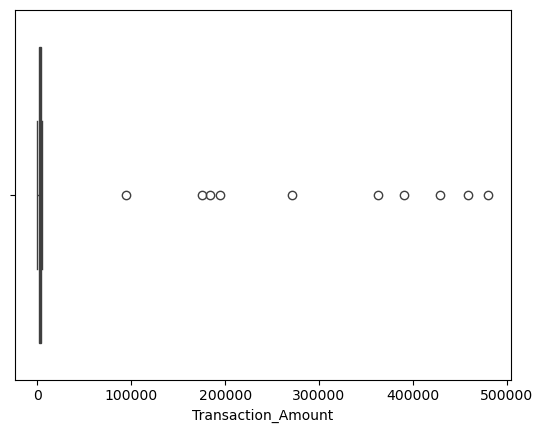

In [10]:
# Check outliers in transaction_df's Transaction_Amount using boxplot
sns.boxplot(x=transactions_df["Transaction_Amount"])

<Axes: xlabel='Satisfaction_Score'>

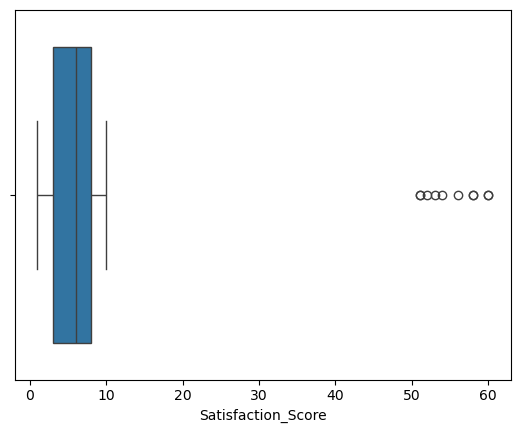

In [11]:
# Check outliers in customers_df's Satisfaction_Score using boxplot
sns.boxplot(x=customers_df["Satisfaction_Score"])

<Axes: xlabel='Likelihood_to_Recommend'>

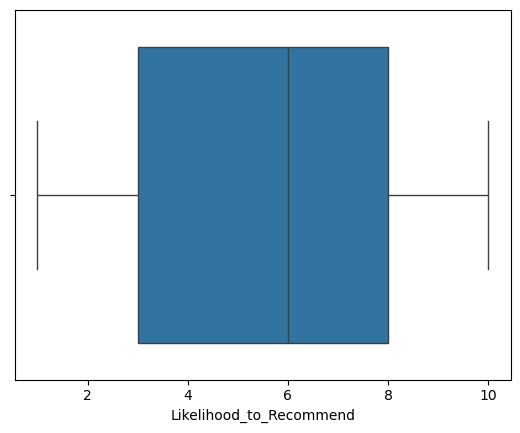

In [12]:
# Check outliers in customers_df's Likelihood_to_Recommend using boxplot
sns.boxplot(x=customers_df["Likelihood_to_Recommend"])

In [13]:
# Drop duplicates
transactions_df = transactions_df.drop_duplicates()
products_df = products_df.drop_duplicates()
customers_df = customers_df.drop_duplicates()

In [14]:
# Handle missing values for transactions_df by imputing transaction_amount with the mean grouped by transaction_type
transactions_df['Transaction_Amount'] = transactions_df.groupby('Transaction_Type')['Transaction_Amount'].transform(lambda x: x.fillna(x.mean()))

# Drop target_age column for products_df since all rows are null
products_df = products_df.drop(columns=['Target_Age_Group'])

# Handle missing values for customers_df by imputing satisfactor_score with the mean 
customers_df['Satisfaction_Score'] = customers_df['Satisfaction_Score'].fillna(customers_df['Satisfaction_Score'].mean())

In [15]:
# Remove rows in customers_df where Satisfaction Score is greater than 10 (Invalid Outliers)

customers_df = customers_df[customers_df["Satisfaction_Score"] <= 10]

In [16]:
# Convert Transaction_Date to datetime
transactions_df["Transaction_Date"] = pd.to_datetime(transactions_df["Transaction_Date"])

# Convert Transaction_Type to string
transactions_df["Transaction_Type"] = transactions_df["Transaction_Type"].astype(str)

# Convert Product_Name, Product_Type, Risk_Level, and Target_Income_Group to string
products_df["Product_Name"] = products_df["Product_Name"].astype(str)
products_df["Product_Type"] = products_df["Product_Type"].astype(str)
products_df["Risk_Level"] = products_df["Risk_Level"].astype(str)
products_df["Target_Income_Group"] = products_df["Target_Income_Group"].astype(str)

# Convert Satisfaction_Score to integer
customers_df["Satisfaction_Score"] = customers_df["Satisfaction_Score"].astype(int)

# Convert Feedback_Comments to string
customers_df["Feedback_Comments"] = customers_df["Feedback_Comments"].astype(str)

# Verify the changes
print(transactions_df.dtypes)
print(products_df.dtypes)
print(customers_df.dtypes)

Transaction_ID                 int64
Customer_ID                    int64
Transaction_Date      datetime64[ns]
Transaction_Amount           float64
Transaction_Type              object
dtype: object
Product_ID              int64
Product_Name           object
Product_Type           object
Risk_Level             object
Target_Income_Group    object
dtype: object
Customer_ID                 int64
Satisfaction_Score          int32
Feedback_Comments          object
Likelihood_to_Recommend     int64
dtype: object


In [17]:
transactions_df.head(10)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase
1,2,826,2023-01-01 01:00:00,3736.422663,Bill Payment
2,3,916,2023-01-01 02:00:00,10.000000,Purchase
3,4,109,2023-01-01 03:00:00,72.000000,Investment
4,5,889,2023-01-01 04:00:00,1793.000000,Investment
5,6,348,2023-01-01 05:00:00,3824.000000,Loan Payment
6,7,50,2023-01-01 06:00:00,235.000000,Loan Payment
7,8,916,2023-01-01 07:00:00,1052.000000,Loan Payment
8,9,105,2023-01-01 08:00:00,854.000000,Purchase
9,10,420,2023-01-01 09:00:00,2690.000000,Investment


In [18]:
products_df.head(10)

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,Medium
1,2,Gold Savings Account,Savings Account,Low,Low
2,3,High-Yield Investment Account,Investment,High,High
3,4,Mortgage Loan,Loan,Medium,High
4,5,Auto Loan,Loan,Medium,Medium
5,6,Personal Loan,Loan,Medium,Low
6,7,Youth Savings Account,Savings Account,Low,Low
7,8,Retirement Investment Fund,Investment,High,High
8,9,Business Loan,Loan,Medium,Medium
9,10,Travel Credit Card,Credit Card,Medium,Medium


In [19]:
customers_df.head(10)

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10,Very satisfied,9
1,2,3,Very satisfied,3
2,3,10,Very satisfied,1
3,4,7,Needs improvement,4
4,5,8,Unsatisfactory,7
5,6,3,Needs improvement,1
6,7,3,Needs improvement,2
7,8,7,Needs improvement,5
8,9,10,Good service,9
9,10,7,Good service,1


# Feature Engineering

In [20]:
# Extract Transaction_Year, transaction_month, transaction_day, transaction_dayofweek for temporal patterns
transactions_df['Transaction_Year'] = transactions_df['Transaction_Date'].dt.year
transactions_df['Transaction_Month'] = transactions_df['Transaction_Date'].dt.month
transactions_df['Transaction_Day'] = transactions_df['Transaction_Date'].dt.day
transactions_df['Transaction_Dayofweek'] = transactions_df['Transaction_Date'].dt.dayofweek

# Calculate the number of transactions per customer
transactions_per_customer = transactions_df.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
transactions_per_customer.rename(columns={'Transaction_ID': 'Transactions_Per_Customer'}, inplace=True)
transactions_df = transactions_df.merge(transactions_per_customer, on='Customer_ID', how='left')

# Calculate the average transaction amount per customer
avg_transaction_amount = transactions_df.groupby('Customer_ID')['Transaction_Amount'].mean().reset_index()
avg_transaction_amount.rename(columns={'Transaction_Amount': 'Avg_Transaction_Amount_Per_Customer'}, inplace=True)
transactions_df = transactions_df.merge(avg_transaction_amount, on='Customer_ID', how='left')

total_transaction_amount = transactions_df.groupby('Customer_ID')['Transaction_Amount'].sum().reset_index()
total_transaction_amount.rename(columns={'Transaction_Amount': 'Total_Transaction_Amount_Per_Customer'}, inplace=True)
transactions_df = transactions_df.merge(total_transaction_amount, on='Customer_ID', how='left')

last_transaction_date = transactions_df.groupby('Customer_ID')['Transaction_Date'].max().reset_index()
last_transaction_date['Days_Since_Last_Transaction_Per_Customer'] = (pd.to_datetime('today') - last_transaction_date['Transaction_Date']).dt.days
transactions_df = transactions_df.merge(last_transaction_date[['Customer_ID', 'Days_Since_Last_Transaction_Per_Customer']], on='Customer_ID', how='left')

In [21]:
transactions_df.head(10)

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Dayofweek,Transactions_Per_Customer,Avg_Transaction_Amount_Per_Customer,Total_Transaction_Amount_Per_Customer,Days_Since_Last_Transaction_Per_Customer
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase,2023,1,1,6,7,3195.000000,22365.000000,561
1,2,826,2023-01-01 01:00:00,3736.422663,Bill Payment,2023,1,1,6,3,2727.474221,8182.422663,568
2,3,916,2023-01-01 02:00:00,10.000000,Purchase,2023,1,1,6,9,2045.111111,18406.000000,588
3,4,109,2023-01-01 03:00:00,72.000000,Investment,2023,1,1,6,5,1498.400000,7492.000000,631
4,5,889,2023-01-01 04:00:00,1793.000000,Investment,2023,1,1,6,3,2116.278005,6348.834015,661
5,6,348,2023-01-01 05:00:00,3824.000000,Loan Payment,2023,1,1,6,6,2410.500000,14463.000000,660
6,7,50,2023-01-01 06:00:00,235.000000,Loan Payment,2023,1,1,6,6,1288.333333,7730.000000,604
7,8,916,2023-01-01 07:00:00,1052.000000,Loan Payment,2023,1,1,6,9,2045.111111,18406.000000,588
8,9,105,2023-01-01 08:00:00,854.000000,Purchase,2023,1,1,6,7,1787.857143,12515.000000,619
9,10,420,2023-01-01 09:00:00,2690.000000,Investment,2023,1,1,6,9,1964.092668,17676.834015,610


In [22]:
# Convert Product_Type into numerical encoding
products_df['Product_Type_Encoded'] = products_df['Product_Type'].astype('category').cat.codes

# Convert Risk_Level into numerical encoding
products_df['Risk_Level_Encoded'] = products_df['Risk_Level'].astype('category').cat.codes

# Convert Target_Income_Group into numerical encoding
products_df['Target_Income_Group_Encoded'] = products_df['Target_Income_Group'].astype('category').cat.codes

# Count the number of products available per Product_Type
products_per_type = products_df.groupby('Product_Type')['Product_ID'].count().reset_index()
products_per_type.rename(columns={'Product_ID': 'Products_Per_Type'}, inplace=True)
products_df = products_df.merge(products_per_type, on='Product_Type', how='left')

# Count the number of products available per Risk_Level
products_per_risk = products_df.groupby('Risk_Level')['Product_ID'].count().reset_index()
products_per_risk.rename(columns={'Product_ID': 'Products_Per_Risk_Level'}, inplace=True)
products_df = products_df.merge(products_per_risk, on='Risk_Level', how='left')

# Count the number of products available per Target_Income_Group
products_per_income = products_df.groupby('Target_Income_Group')['Product_ID'].count().reset_index()
products_per_income.rename(columns={'Product_ID': 'Products_Per_Income_Group'}, inplace=True)
products_df = products_df.merge(products_per_income, on='Target_Income_Group', how='left')



In [23]:
products_df.head(10)

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group,Product_Type_Encoded,Risk_Level_Encoded,Target_Income_Group_Encoded,Products_Per_Type,Products_Per_Risk_Level,Products_Per_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,Medium,0,2,2,2,6,4
1,2,Gold Savings Account,Savings Account,Low,Low,3,1,1,2,2,3
2,3,High-Yield Investment Account,Investment,High,High,1,0,0,2,2,3
3,4,Mortgage Loan,Loan,Medium,High,2,2,0,4,6,3
4,5,Auto Loan,Loan,Medium,Medium,2,2,2,4,6,4
5,6,Personal Loan,Loan,Medium,Low,2,2,1,4,6,3
6,7,Youth Savings Account,Savings Account,Low,Low,3,1,1,2,2,3
7,8,Retirement Investment Fund,Investment,High,High,1,0,0,2,2,3
8,9,Business Loan,Loan,Medium,Medium,2,2,2,4,6,4
9,10,Travel Credit Card,Credit Card,Medium,Medium,0,2,2,2,6,4


In [24]:
# Normalize Satisfaction_Score (scale between 0 and 1)
customers_df['Satisfaction_Score_Normalized'] = customers_df['Satisfaction_Score'] / customers_df['Satisfaction_Score'].max()

# Normalize Likelihood_to_Recommend (scale between 0 and 1)
customers_df['Likelihood_to_Recommend_Normalized'] = customers_df['Likelihood_to_Recommend'] / customers_df['Likelihood_to_Recommend'].max()

# Convert Feedback_Comments into sentiment categories (Basic Sentiment Mapping)
customers_df['Feedback_Sentiment'] = customers_df['Feedback_Comments'].map({
    'Very satisfied': 'Positive',
    'Needs improvement': 'Neutral',
    'Unsatisfactory': 'Negative'
})

# Convert Feedback_Sentiment into numerical encoding
customers_df['Feedback_Sentiment_Encoded'] = customers_df['Feedback_Sentiment'].astype('category').cat.codes

In [25]:
customers_df.head(10)

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend,Satisfaction_Score_Normalized,Likelihood_to_Recommend_Normalized,Feedback_Sentiment,Feedback_Sentiment_Encoded
0,1,10,Very satisfied,9,1.0,0.9,Positive,2
1,2,3,Very satisfied,3,0.3,0.3,Positive,2
2,3,10,Very satisfied,1,1.0,0.1,Positive,2
3,4,7,Needs improvement,4,0.7,0.4,Neutral,1
4,5,8,Unsatisfactory,7,0.8,0.7,Negative,0
5,6,3,Needs improvement,1,0.3,0.1,Neutral,1
6,7,3,Needs improvement,2,0.3,0.2,Neutral,1
7,8,7,Needs improvement,5,0.7,0.5,Neutral,1
8,9,10,Good service,9,1.0,0.9,NaN,-1
9,10,7,Good service,1,0.7,0.1,NaN,-1
